<a href="https://colab.research.google.com/github/Amy-lab/DS-Snippets/blob/master/CART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Arbol de Clasificación

In [ ]:
# Importamos las librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from sklearn.tree import (DecisionTreeClassifier as DTC , DecisionTreeRegressor as DTR , plot_tree , export_text)
from sklearn.metrics import (accuracy_score , log_loss)

In [ ]:
link = "https://raw.githubusercontent.com/sfkaplan/Curso-Pronostico/main/Heart.csv"
df = pd.read_csv(link)

In [ ]:
df = df.drop("Unnamed: 0", axis=1)

[Heart disease database,  UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/45/heart+disease)

In [ ]:
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [ ]:
# Vemos si hay NaN

df.isnull().sum()

,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0
Oldpeak,0


In [ ]:
# Eliminamos los datos faltantes

df2 = df.dropna().reset_index().iloc[:,1:]

In [ ]:
df2

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable,Yes
293,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
294,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
295,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes


In [ ]:
# Nuestra variable categórica a predecir es AHD

y = df2.AHD
X = df2.drop("AHD", axis=1)

In [ ]:
X

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable
293,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable
294,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable
295,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable


In [ ]:
X.isnull().sum()

,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0
Oldpeak,0


In [ ]:
# Generamos el encoding para las variables categóricas

dummies = pd.get_dummies(X[['ChestPain', 'Thal']], dtype=int).reset_index().iloc[:,1:]
y_1 = pd.get_dummies(y)

In [ ]:
dummies

,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,0,0,0,1,1,0,0
1,1,0,0,0,0,1,0
2,1,0,0,0,0,0,1
3,0,1,0,0,0,1,0
4,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...
292,1,0,0,0,0,0,1
293,0,0,0,1,0,0,1
294,1,0,0,0,0,0,1
295,1,0,0,0,0,0,1


In [ ]:
y_1

,No,Yes
0,True,False
1,False,True
2,False,True
3,True,False
4,True,False
...,...,...
292,False,True
293,False,True
294,False,True
295,False,True


In [ ]:
X_final = X.drop(['ChestPain', 'Thal'], axis=1).astype('float64')

In [ ]:
X_final

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0
293,45.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0
294,68.0,1.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0
295,57.0,1.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0


In [ ]:
X_final2 = pd.concat([X_final, dummies[['ChestPain_asymptomatic', 'ChestPain_nonanginal', 'ChestPain_nontypical',
                                       'Thal_fixed', 'Thal_normal']]], axis = 1)

In [ ]:
y_final = y_1.iloc[:,1]

In [ ]:
X_final2

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,Thal_fixed,Thal_normal
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,0,0,0,1,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,1,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,1,0,0,0,0
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,0,1,0,0,1
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,1,0,0,0,0
293,45.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,0,0,0,0,0
294,68.0,1.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,1,0,0,0,0
295,57.0,1.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,1,0,0,0,0


In [ ]:
# Ajustamos el Árbol de Clasificación

# Utilizamos el criterio de entropía

# El "max_depth" es para determinar el máximo valor de nodos intermedios.

# Si el valor es 'None', se extiende el árbol hasta que los nodos tengan 2 o menos observaciones

clf = DTC(criterion='entropy', max_depth=3, random_state = 0)
clf.fit(X_final2, y_final)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
accuracy_score(y_final , clf.predict(X_final2))

0.8484848484848485

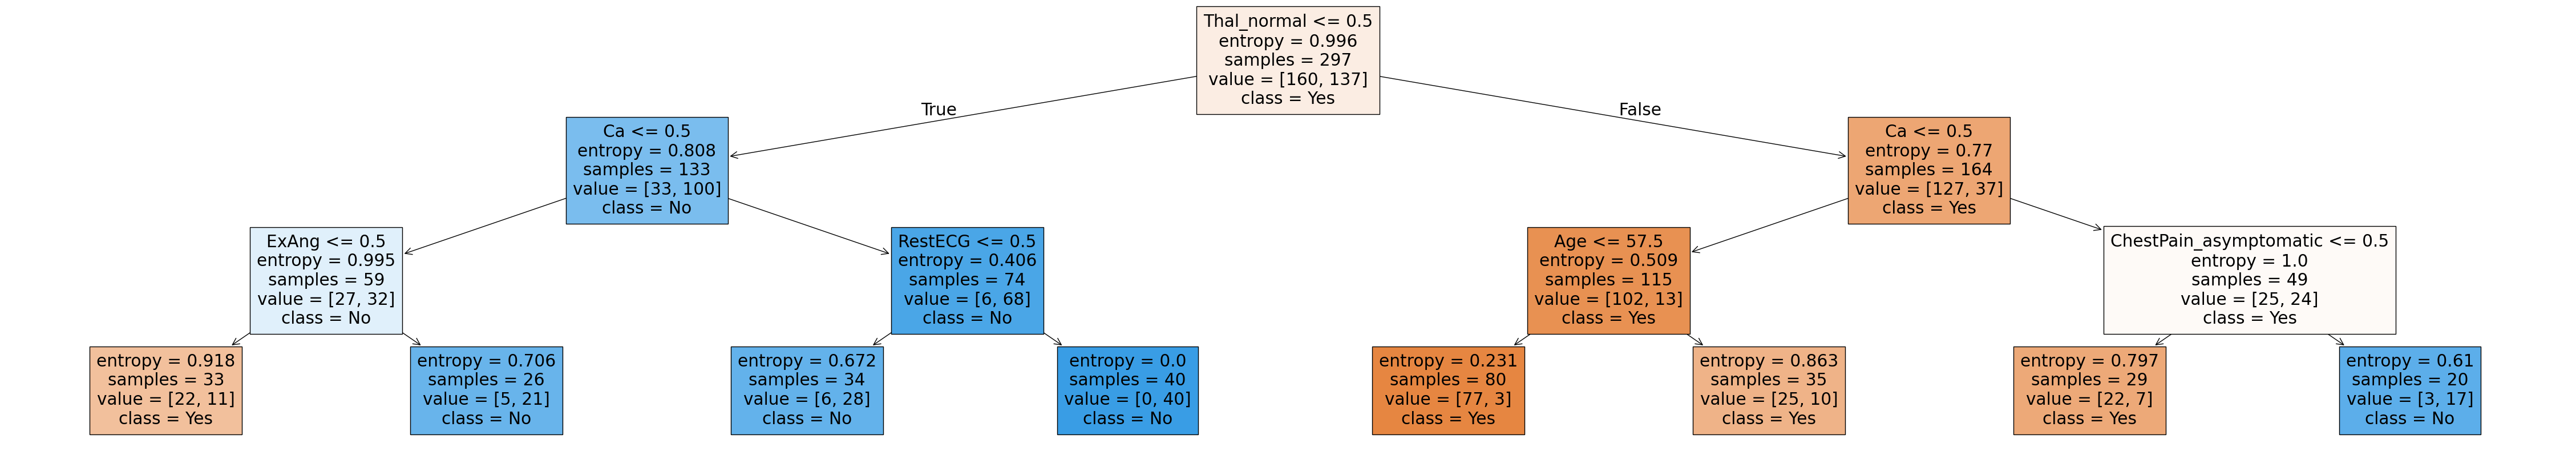

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(58,10))
_ = tree.plot_tree(clf,feature_names=X_final2.columns,
                   class_names=["Yes", "No"],
                   filled=True)

In [ ]:
# Observar: los nodos terminales divididos por edad son asignados a la misma clase

# Por qué ocurre? Porque se minimiza la entropía, es decir, se maximiza la pureza del nodo

# En el nodo izquierdo, la entropía será: -(77/80*log_2(77/80) + 3/80*log_2(3/80)) = 0.231

# En el nodo derecho: -(25/35*log_2(25/35) + 10/35*log_2(10/35)) = 0.863

# Si se considera la "entropía ponderada": (80/115)*0.231 + (35/115)*0.863 = 0.423

# La entropía 'conjunta' sería: -(102/115*ln(102/115) + 13/115*ln(13/115)) = 0.509

# No se reduce el error de clasificación, pero sí la entropía, y por ende la pureza del nodo.

# Recordar: sklearn usa log base 2.

In [ ]:
-(77/80*np.log2(77/80) + 3/80*np.log2(3/80))

0.2307099556914764

In [ ]:
-(25/35*np.log2(25/35) + 10/35*np.log2(10/35))

0.863120568566631

In [ ]:
(80/115)*0.231 + (35/115)*0.863

0.42334782608695654

In [ ]:
-(102/115*np.log2(102/115) + 13/115*np.log2(13/115))

0.5090283012319687

In [ ]:
# Para mostrar como se hace el Prunning, utilizamos un max depth de 7, y de ese árbol realizamos el prunning por
# Cost Complexity

# Antes, dividiremos la muestra en conjunto de entrenamiento y de testeo, para elegir el parámetro de tunning
# por Cross-Validation

from sklearn.model_selection import train_test_split
(X_train , X_test , y_train , y_test) = skm.train_test_split(X_final2, y_final, test_size =0.25, random_state =5)

In [ ]:
X_train

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,Thal_fixed,Thal_normal
95,59.0,1.0,110.0,239.0,0.0,2.0,142.0,1.0,1.2,2.0,1.0,1,0,0,0,0
71,67.0,1.0,125.0,254.0,1.0,0.0,163.0,0.0,0.2,2.0,2.0,1,0,0,0,0
18,48.0,0.0,130.0,275.0,0.0,0.0,139.0,0.0,0.2,1.0,0.0,0,1,0,0,1
232,54.0,1.0,122.0,286.0,0.0,2.0,116.0,1.0,3.2,2.0,2.0,1,0,0,0,1
230,74.0,0.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,63.0,1.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,1,0,0,0,0
73,65.0,1.0,110.0,248.0,0.0,2.0,158.0,0.0,0.6,1.0,2.0,1,0,0,1,0
118,65.0,1.0,135.0,254.0,0.0,2.0,127.0,0.0,2.8,2.0,1.0,1,0,0,0,0
189,51.0,1.0,140.0,298.0,0.0,0.0,122.0,1.0,4.2,2.0,3.0,1,0,0,0,0


In [ ]:
clf2 = DTC(criterion='entropy', max_depth = 7, random_state =5)
clf2.fit(X_train , y_train)
accuracy_score(y_test , clf2.predict(X_test))

0.7466666666666667

In [ ]:
# Utilizamos el método "complexity prunning" de sklearn

# Con este método, se obtiene un conjunto de alphas (parámetros de tunning) y subárboles óptimos correspondientes a alpha

# Finalmente, para ese conjunto de (alpha, T_alpha), se selecciona el subárbol óptimo con K-Fold cross validation, K = 5

ccp_path = clf2.cost_complexity_pruning_path(X_train , y_train)
kfold = skm.KFold(5, random_state=5, shuffle=True)

In [ ]:
# Veamos el cost complexity path
ccp_path

{'ccp_alphas': array([0.        , 0.00900901, 0.00932817, 0.0124094 , 0.01280497,
        0.01296325, 0.01461762, 0.01521371, 0.01645033, 0.01936424,
        0.02203824, 0.02284476, 0.02329458, 0.02386073, 0.02410908,
        0.0260544 , 0.03467414, 0.03752116, 0.03757234, 0.03758692,
        0.07005795, 0.07060195, 0.21796656]),
 'impurities': array([0.07050218, 0.0885202 , 0.10717655, 0.11958595, 0.17080581,
        0.18376906, 0.19838668, 0.22881411, 0.24526443, 0.2839929 ,
        0.30603114, 0.32887591, 0.35217049, 0.37603121, 0.40014029,
        0.4522491 , 0.52159739, 0.55911855, 0.59669089, 0.63427781,
        0.70433576, 0.77493771, 0.99290427])}

In [ ]:
# Finalmente, utilizamos GridSearchCV con los valores de alpha y los K-Folds para calcular el

# Error estimado por CV

# Se obtiene así el subárbol óptimo

grid = skm.GridSearchCV(clf2 , {'ccp_alpha': ccp_path.ccp_alphas}, refit=True , cv=kfold , scoring='accuracy')
grid.fit(X_train , y_train)
grid.best_score_

0.7931313131313131

In [ ]:
# Veamos el alpha óptimo
best_alpha = grid.best_params_['ccp_alpha']
print(f"Optimal ccp_alpha: {best_alpha}")


Optimal ccp_alpha: 0.019364235598409017


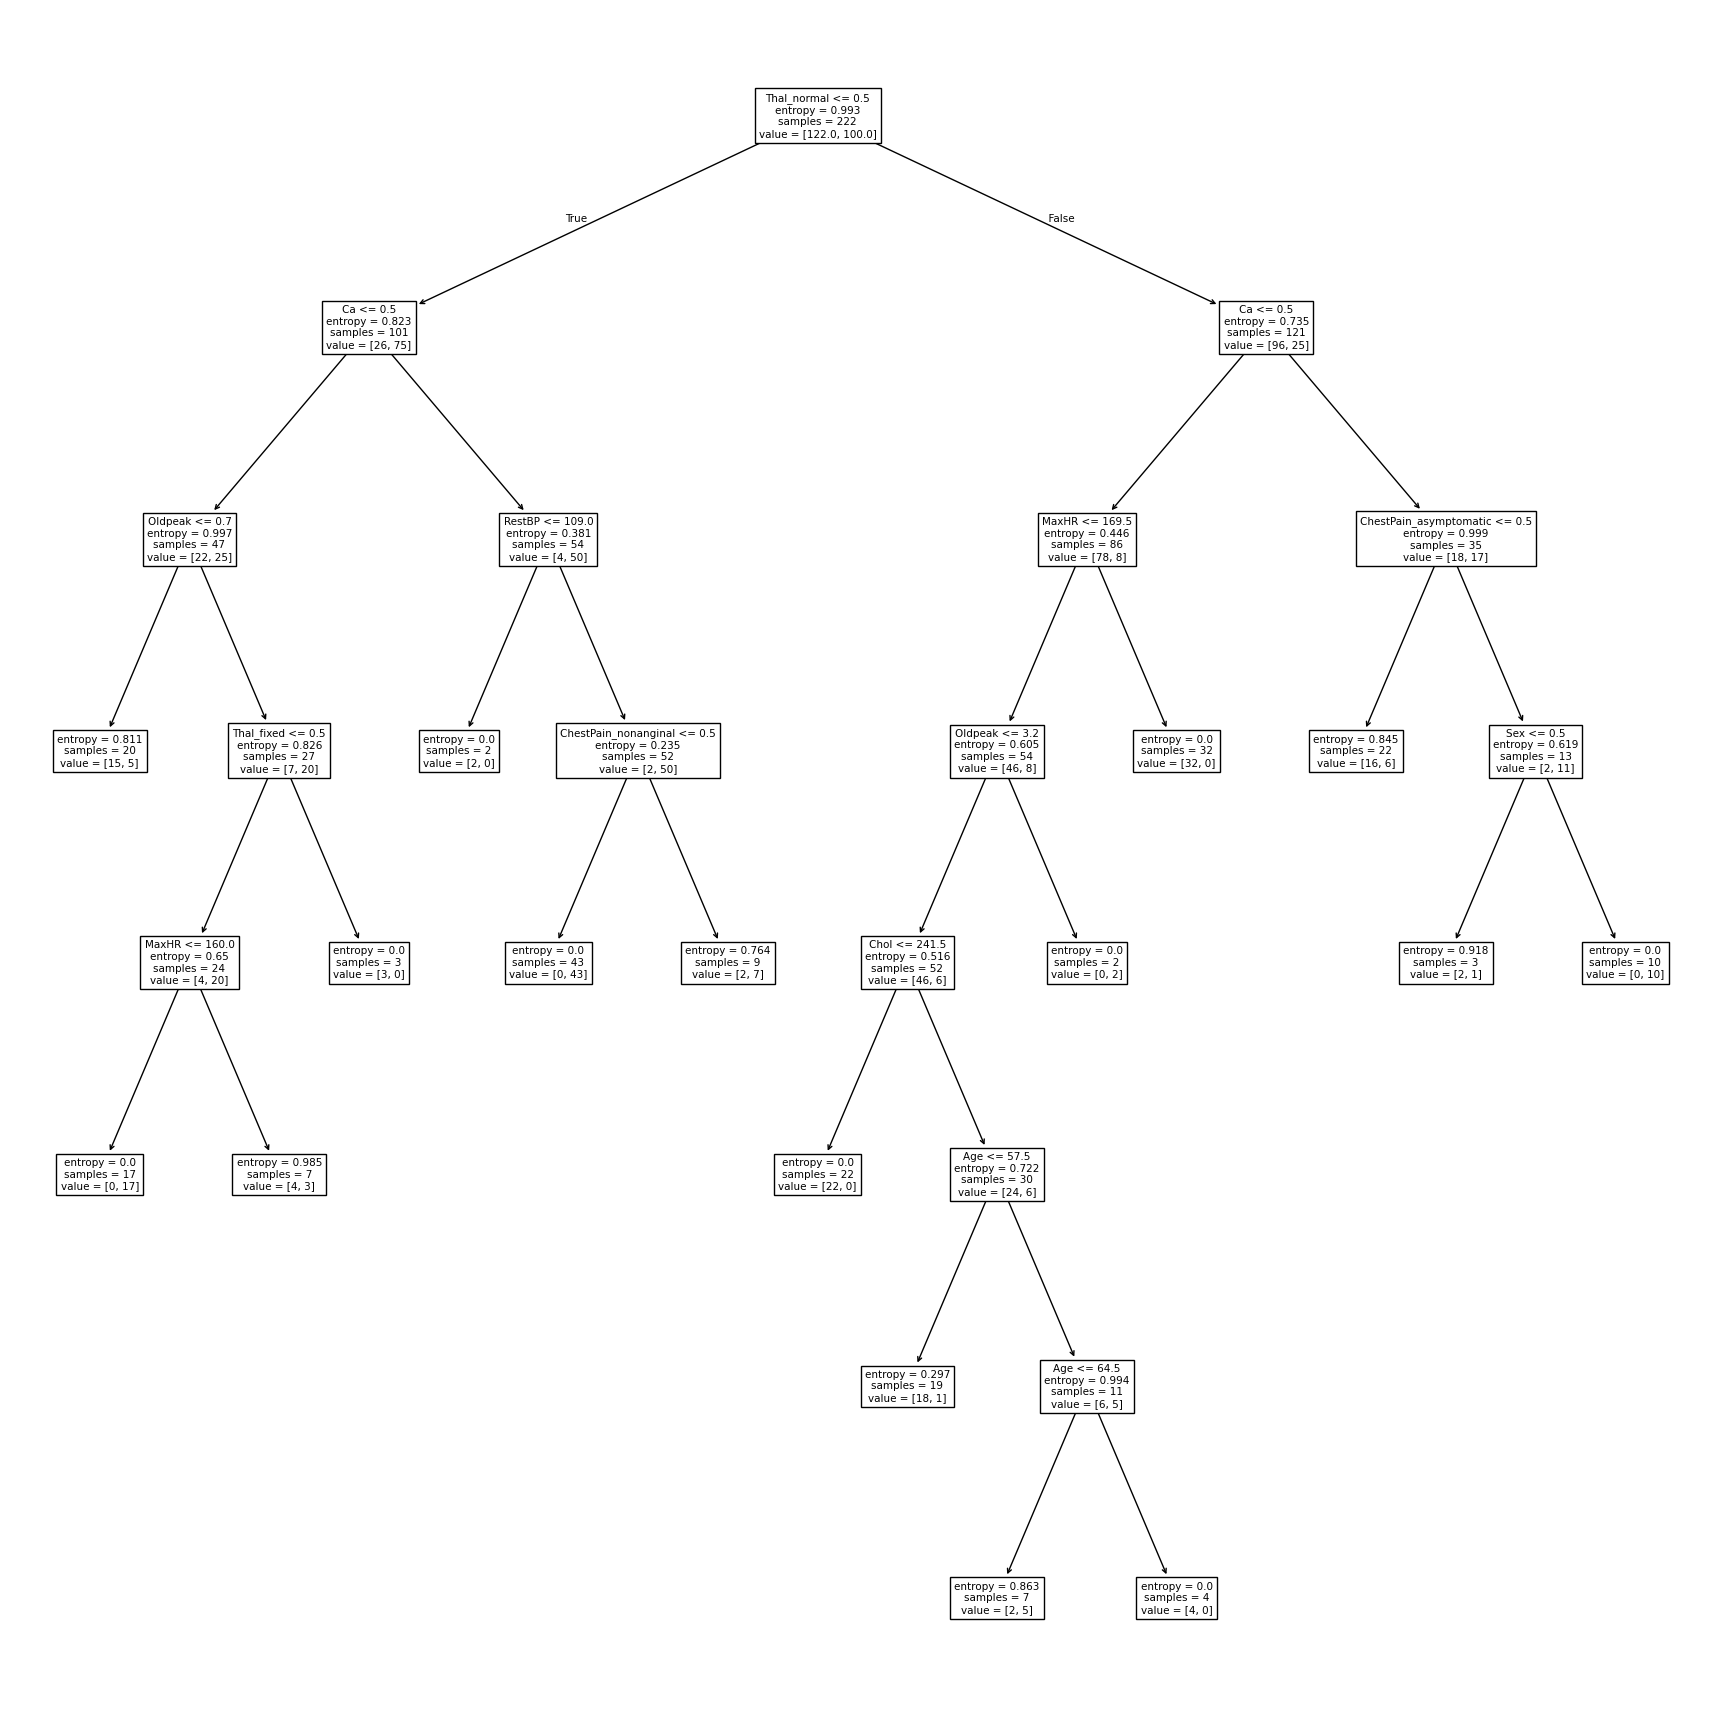

In [ ]:
ax = plt.subplots(figsize=(22, 22))[1]
best_ = grid.best_estimator_
tree.plot_tree(best_ , feature_names=X_train.columns , ax=ax);

In [ ]:
# Finalmente, calculamos el accuracy en el conjunto de testeo de este árbol de decisión

print(accuracy_score(y_test ,best_.predict(X_test)))

0.76


In [ ]:
# Probamos qué sucede con Bagging y Random Forest

# Importamos la librería

from sklearn.ensemble import BaggingClassifier

# Luego, ajustamos el modelo

classf1 = BaggingClassifier(estimator=DTC(), n_estimators=5000, random_state=1, n_jobs=-1).fit(X_train, y_train)

In [ ]:
# Realizamos la predicción en el conjunto de testeo, y calculamos la precisión en la predicción


print(accuracy_score(y_test ,classf1.predict(X_test)))

0.8


In [ ]:
# Hacemos lo propio con Random Forest

# Importamos la librería

from sklearn.ensemble import RandomForestClassifier

# Luego, ajustamos el modelo

classf2 = RandomForestClassifier(n_estimators=5000, random_state=1, n_jobs=-1).fit(X_train, y_train)

# Realizamos la predicción en el conjunto de testeo, y calculamos la precisión en la predicción


print(accuracy_score(y_test ,classf2.predict(X_test)))

0.8533333333333334


In [ ]:
# Vemos por último qué sucede con Ada Boost

# Importamos la librería

from sklearn.ensemble import AdaBoostClassifier

# Luego, ajustamos el modelo

classf3 = AdaBoostClassifier(n_estimators=5000, random_state=1).fit(X_train, y_train)

# Realizamos la predicción en el conjunto de testeo, y calculamos la precisión en la predicción


print(accuracy_score(y_test ,classf3.predict(X_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.8133333333333334


## Arbol de regresión

In [ ]:
# Ahora hacemos lo propio con un árbol de regresión

# Realizamos un árbol de regresión para la base de Hitters

# Eliminamos los NaN

link_2 = "https://raw.githubusercontent.com/sfkaplan/Curso-Pronostico/main/Hitters.csv"

df3 = pd.read_csv(link_2)
df3 = df3.dropna().reset_index().iloc[:,1:]
df3

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
1,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
2,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
3,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
4,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
259,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
260,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
261,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A


In [ ]:
# Eliminamos la columna de jugadores

df3.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
# Generamos las dummies para las variables categóricos, y transformamos en floats el resto de los valores

dummies2 = pd.get_dummies(df3[['League', 'Division', 'NewLeague']])
regressors = df3.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')

regressors

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
1,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
2,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
3,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
4,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,497.0,127.0,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32.0,379.0,311.0,138.0,325.0,9.0,3.0
259,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0
260,475.0,126.0,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7.0,217.0,93.0,146.0,37.0,113.0,7.0
261,573.0,144.0,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97.0,470.0,420.0,332.0,1314.0,131.0,12.0


In [ ]:
dummies2

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
0,False,True,False,True,False,True
1,True,False,False,True,True,False
2,False,True,True,False,False,True
3,False,True,True,False,False,True
4,True,False,False,True,True,False
...,...,...,...,...,...,...
258,False,True,True,False,False,True
259,True,False,True,False,True,False
260,True,False,False,True,True,False
261,True,False,True,False,True,False


In [ ]:
# Incluimos las dummies que generamos


regressors = pd.concat([regressors, dummies2[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)

# Examinamos las características de la matriz de regresores

regressors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        263 non-null    float64
 1   Hits         263 non-null    float64
 2   HmRun        263 non-null    float64
 3   Runs         263 non-null    float64
 4   RBI          263 non-null    float64
 5   Walks        263 non-null    float64
 6   Years        263 non-null    float64
 7   CAtBat       263 non-null    float64
 8   CHits        263 non-null    float64
 9   CHmRun       263 non-null    float64
 10  CRuns        263 non-null    float64
 11  CRBI         263 non-null    float64
 12  CWalks       263 non-null    float64
 13  PutOuts      263 non-null    float64
 14  Assists      263 non-null    float64
 15  Errors       263 non-null    float64
 16  League_N     263 non-null    bool   
 17  Division_W   263 non-null    bool   
 18  NewLeague_N  263 non-null    bool   
dtypes: bool(

In [ ]:
regressors.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000


In [ ]:
# Generamos la variable continua a predecir

dependent = df3.Salary
dependent

,Salary
0,475.0
1,480.0
2,500.0
3,91.5
4,750.0
...,...
258,700.0
259,875.0
260,385.0
261,960.0


In [ ]:
# Dividimos en conjunto de entrenamiento y testeo

(reg_train , reg_test , dep_train , dep_test) = skm.train_test_split(regressors, dependent, test_size =0.25, random_state =0)

In [ ]:
# Realizamos el fit con el árbol de tamaño 7

from sklearn.tree import DecisionTreeRegressor as DTR

clf3 = DTR(max_depth = 7, random_state =0)
clf3.fit(reg_train , dep_train)

DecisionTreeRegressor(max_depth=7, random_state=0)

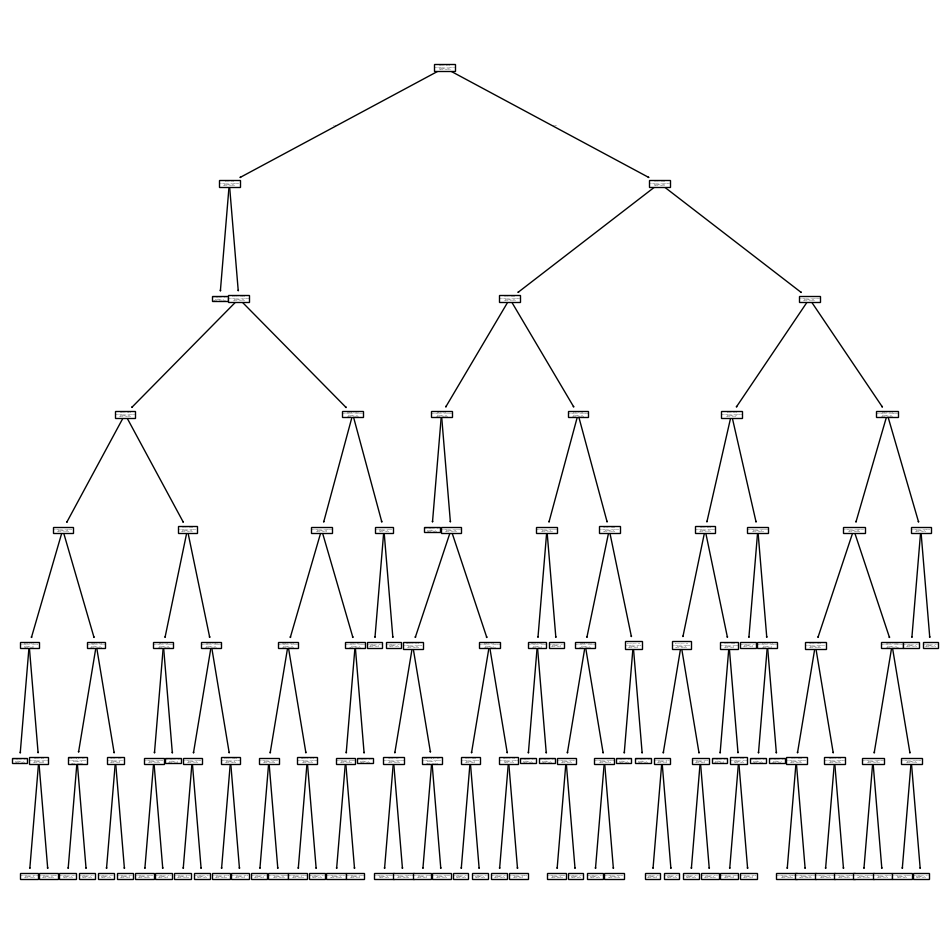

In [ ]:
ax = plt.subplots(figsize =(12,12))[1]
plot_tree(clf3 ,
feature_names=reg_train.columns ,
ax=ax);

In [ ]:
# Realizamos el mismo proceso de cost complexity prunning

ccp_path2 = clf3.cost_complexity_pruning_path(reg_train , dep_train)
kfold2 = skm.KFold(5, shuffle=True , random_state =0)
grid = skm.GridSearchCV(clf3 , {'ccp_alpha': ccp_path2.ccp_alphas}, refit=True , cv=kfold2 , scoring='neg_mean_squared_error')
G = grid.fit(reg_train , dep_train)

In [ ]:
# Del subárbol óptimo, calculamos el MSE en el conjunto de testeo

best_ = G.best_estimator_
np.mean((dep_test - best_.predict(reg_test))**2)

156022.5971135106

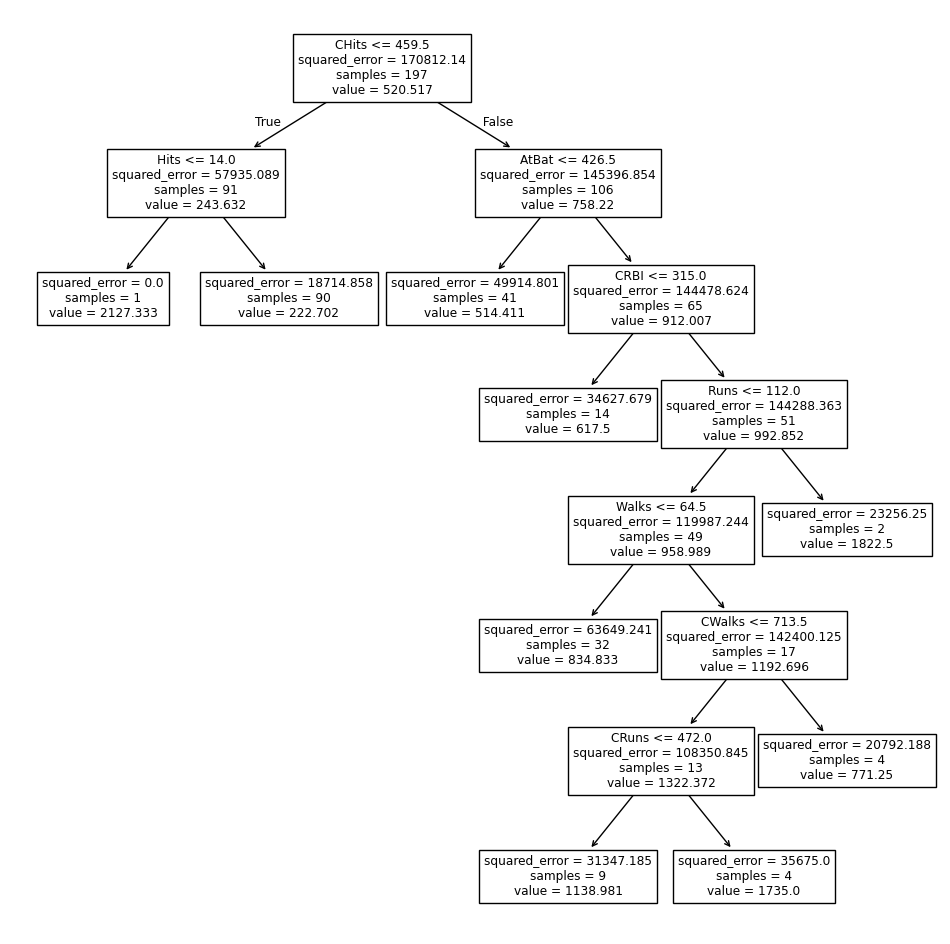

In [ ]:
# Hacemos el plot del subárbol óptimo

ax = plt.subplots(figsize =(12,12))[1]
plot_tree(G.best_estimator_ ,
feature_names=reg_train.columns ,
ax=ax);

In [ ]:
# Continuamos con Bagging, para ver qué sucede con la predicción

# Importamos la librería

from sklearn.ensemble import BaggingRegressor

In [ ]:
# Luego, ajustamos el modelo

regr2 = BaggingRegressor(estimator=DTR(), n_estimators=5000, random_state=0, n_jobs=-1).fit(reg_train, dep_train)

In [ ]:
# Realizamos la predicción en el conjunto de testeo, y calculamos el MSE

pred = regr2.predict(reg_test)
np.mean((dep_test - pred)**2)

113119.20889973785

Como puede apreciarse, es sustancialmente menor al caso de Regression Trees

In [ ]:
# Hacemos lo mismo, pero con Random Forest

# Importamos la librería

from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Ajustamos el modelo

regr3 = RandomForestRegressor(random_state=0, max_features=10, n_estimators=100)

In [ ]:
# Luego, hacemos el fit

regr3.fit(reg_train, dep_train)

RandomForestRegressor(max_features=10, random_state=0)

In [ ]:
# Realizamos la predicción en el conjunto de testeo, y calculamos el MSE

pred2 = regr3.predict(reg_test)
np.mean((dep_test - pred2)**2)

108330.9789162061

En este caso, Random Forest mejora la predicción de Bagging

In [ ]:
# Aplicamos el mismo proceso para Ada Boost

# Importamos la librería

from sklearn.ensemble import AdaBoostRegressor

# Ajustamos el modelo

regr4 = AdaBoostRegressor(random_state=0, n_estimators = 100000)

# Luego, hacemos el fit

regr4.fit(reg_train, dep_train)

# Realizamos la predicción en el conjunto de testeo, y calculamos el MSE

pred3 = regr4.predict(reg_test)
np.mean((dep_test - pred3)**2)

148723.10157658113

# Realizamos ahora un ejercicio completo de comparación entre Árboles de Regresión, Bagging y Random forest. Utilizamos el Dataset de inmuebles de Boston de ISLP

In [ ]:
# Se importa el dataset de Github

link = "https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Boston.csv"
df6 = pd.read_csv(link)

In [ ]:
df6

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
# La variable dependiente es medv
# Formamos la matriz de regresores

y_dep = df6.medv

X_reg = df6.drop("medv", axis=1).astype("float")

In [ ]:
X_reg

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
y_dep

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [ ]:
X_reg.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [ ]:
y_dep.isnull().sum()

0

In [ ]:
X_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [ ]:
X_reg.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
# Aplicamos el train - test split, donde dejaremos el 30% de las observacinoes de testing

(X_train , X_test , y_train , y_test) = skm.train_test_split(X_reg, y_dep, test_size =0.3, random_state =0)

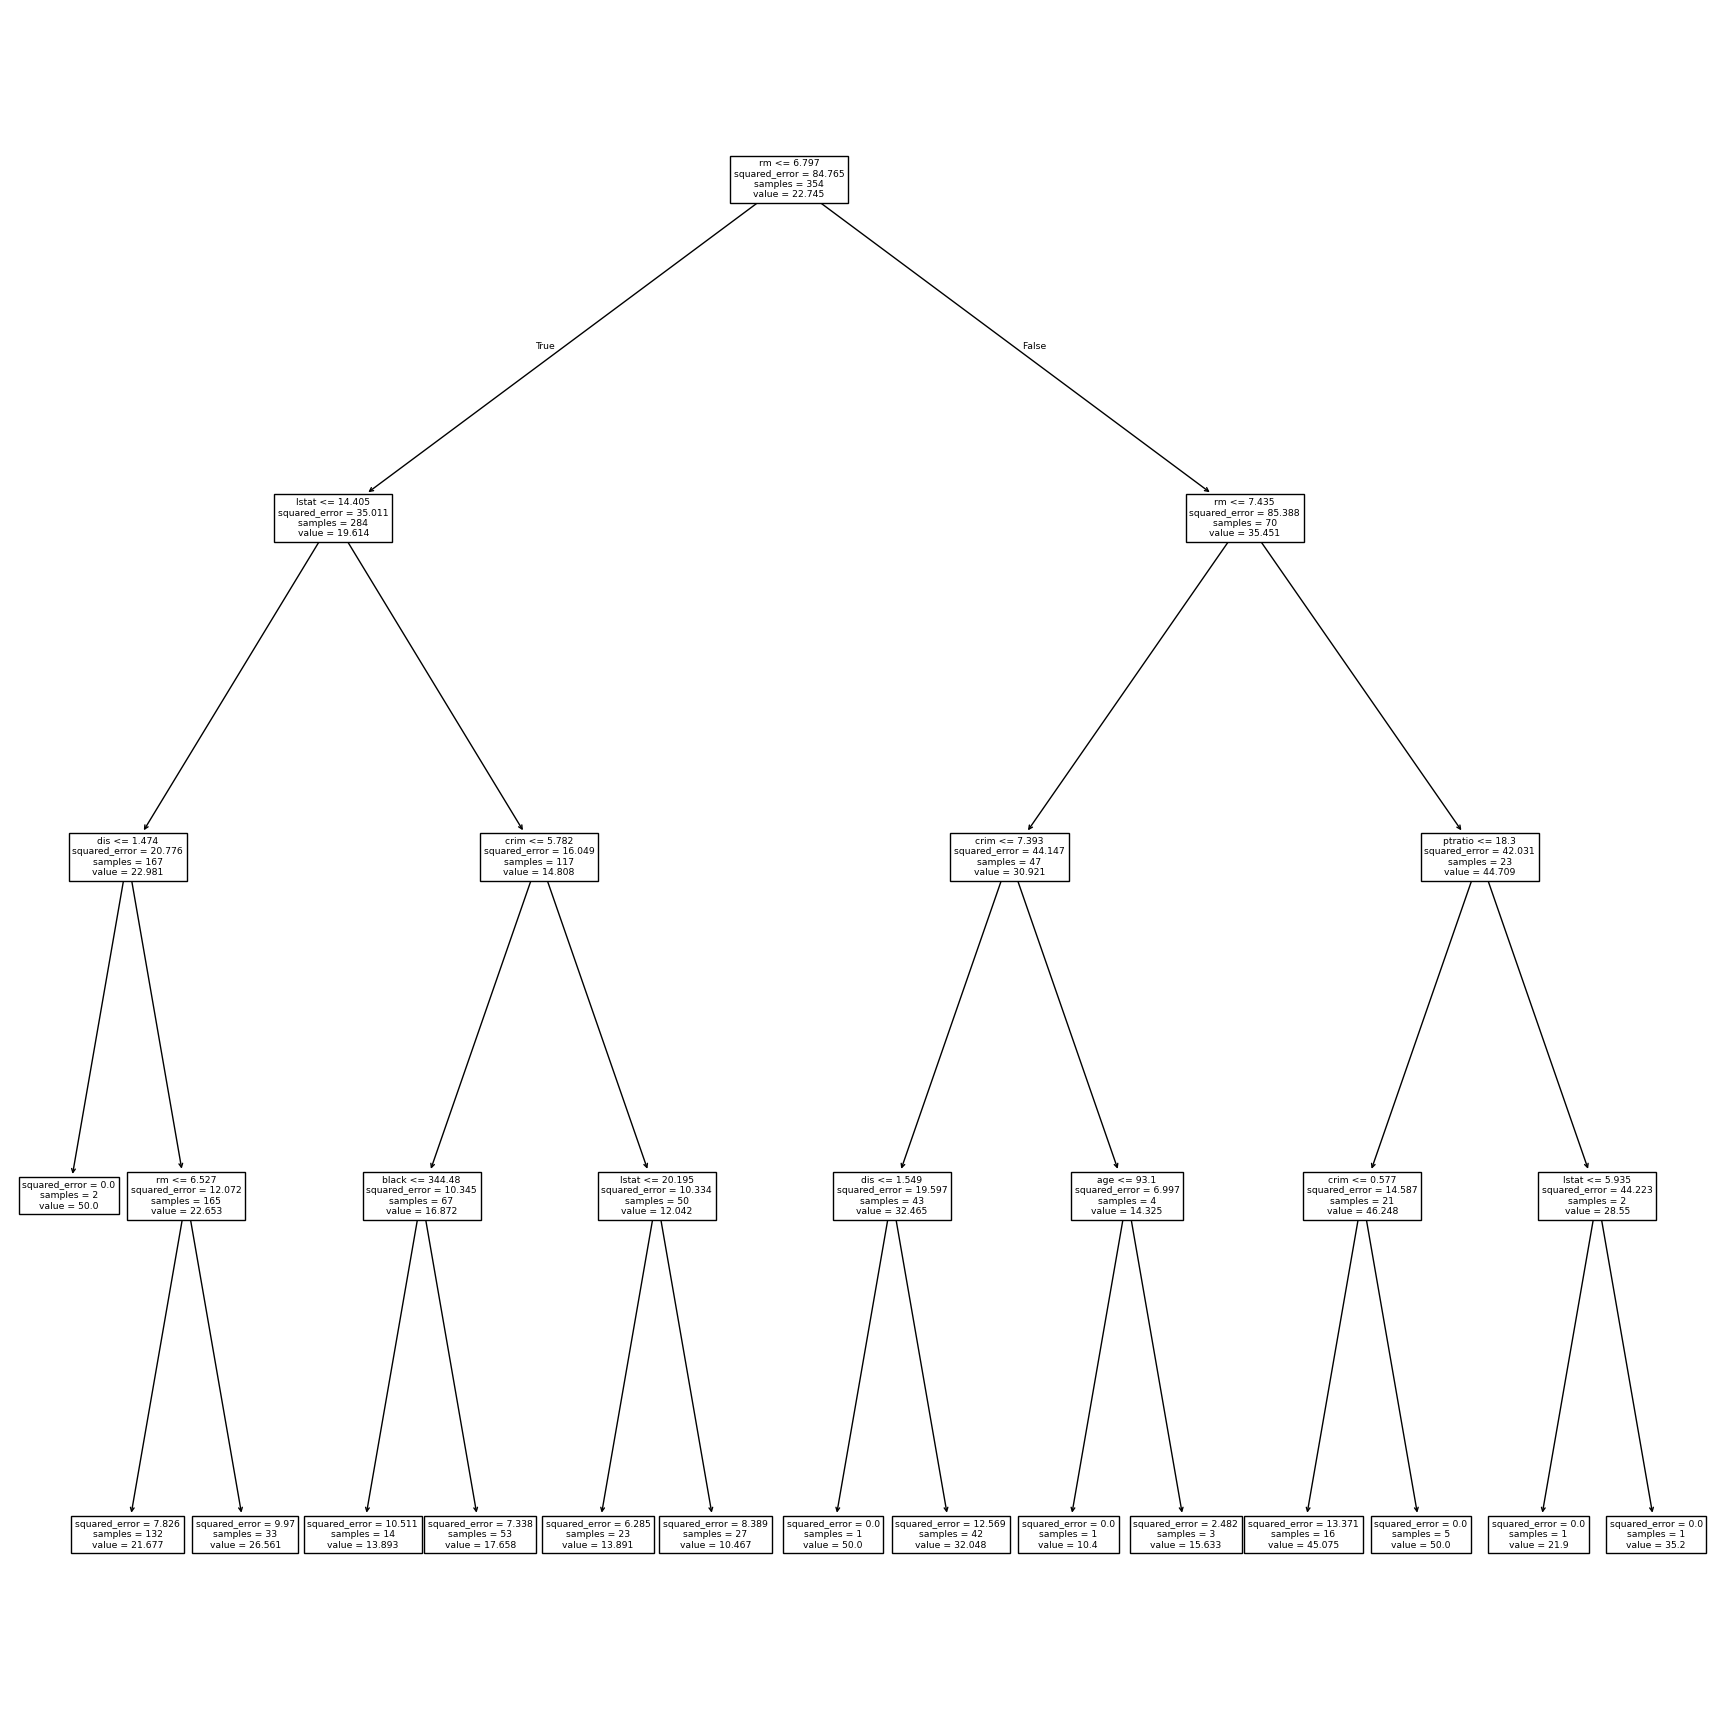

In [ ]:
# Corremos el árbol de regresión y hacemos el plot

reg = DTR(max_depth =4)
reg.fit(X_train , y_train)
ax = plt.subplots(figsize =(22,22))[1]
plot_tree(reg ,
feature_names=X_train.columns ,
ax=ax);

In [ ]:
# Aplicamos K-Fold Cross Validation (con K = 5) para encontrar el subárbol óptimo

ccp_path = reg.cost_complexity_pruning_path(X_train , y_train)
kfold = skm.KFold(5, shuffle=True , random_state =0)
grid = skm.GridSearchCV(reg , {'ccp_alpha': ccp_path.ccp_alphas}, refit=True , cv=kfold , scoring='neg_mean_squared_error')
G = grid.fit(X_train , y_train)

In [ ]:
ccp_path.ccp_alphas

array([ 0.        ,  0.05802495,  0.24984463,  0.26102368,  0.41147892,
        0.44361061,  0.88924552,  1.6156522 ,  1.77896803,  1.88662474,
        3.40178969,  4.17448592,  8.29259286, 12.98252736, 39.79182618])

In [ ]:
# Calculamos el MSE en el test set

best_ = G.best_estimator_
np.mean((y_test - best_.predict(X_test))**2)

25.47963437775141

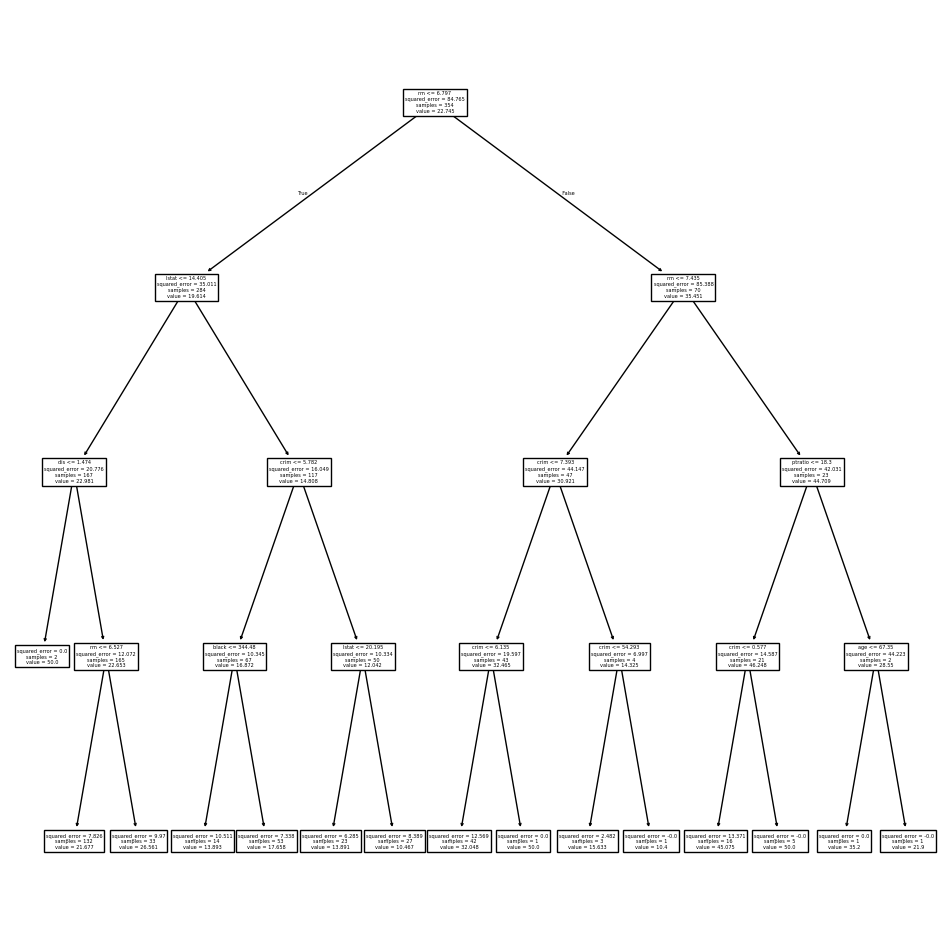

In [ ]:
# Hacemos el plot del subárbol óptimo

ax = plt.subplots(figsize =(12,12))[1]
plot_tree(G.best_estimator_ ,
feature_names=X_train.columns ,
ax=ax);

In [ ]:
# Aplicamos Bagging
# Para ello, usamos Random Forest con m = p (nro de regresores en cada nodo que se utiliza)

bag_boston = RandomForestRegressor(max_features=X_train.shape[1], random_state =0, n_estimators=1000)
bag_boston.fit(X_train , y_train)

RandomForestRegressor(max_features=13, n_estimators=1000, random_state=0)

14.270432025526356

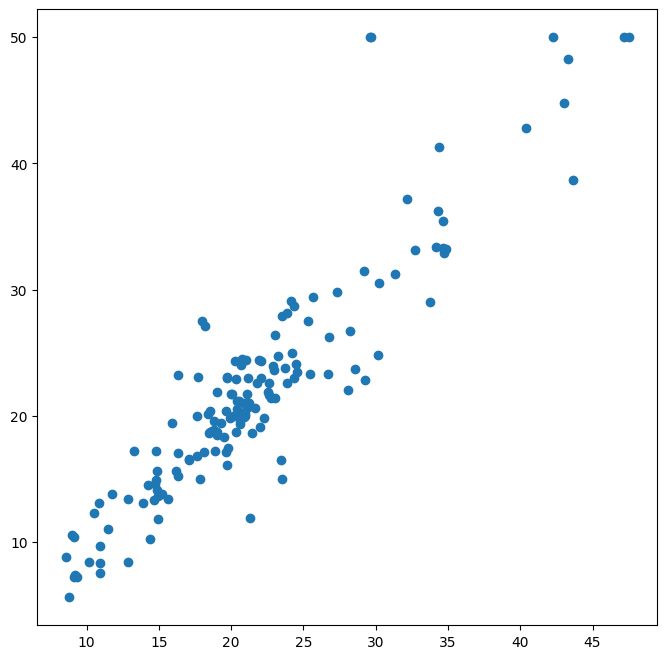

In [ ]:
# Calculamos el MSE en el test set de Bagging

ax = plt.subplots(figsize =(8,8))[1]
y_hat_bag = bag_boston.predict(X_test)
ax.scatter(y_hat_bag , y_test)
np.mean((y_test - y_hat_bag)**2)

In [ ]:
# Veamos qué sucede cuando aumentamos el número de árboles que se utilizan para promediar en Bagging

bag_boston2 = RandomForestRegressor(max_features=X_train.shape[1], random_state =0, n_estimators = 10000, n_jobs=-1)
bag_boston2.fit(X_train , y_train)

RandomForestRegressor(max_features=13, n_estimators=10000, n_jobs=-1,
                      random_state=0)

14.521955262926996

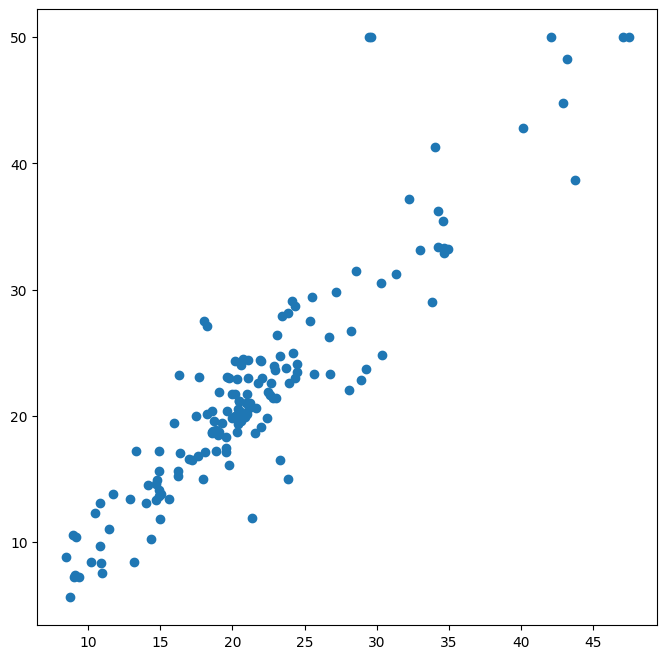

In [ ]:
# Calculamos el MSE en el test set de Bagging

ax = plt.subplots(figsize =(8,8))[1]
y_hat_bag2 = bag_boston2.predict(X_test)
ax.scatter(y_hat_bag2 , y_test)
np.mean((y_test - y_hat_bag2)**2)

Prácticamente no se modifica. No hay overfit en Bagging, sólo underfit

In [ ]:
# Corremos ahora el estimador de Random Forest
# Establecemos un máximo de 8 features por nodo

RF_boston = RandomForestRegressor(max_features=8, random_state =0, n_estimators=1000).fit(X_train , y_train)
y_hat_RF = RF_boston.predict(X_test)
np.mean((y_test - y_hat_RF)**2)

16.789676824342123

La performance de random forest es peor que Bagging

In [ ]:
# Vemos la importancia de las variables en el random forest

feature_imp = pd.DataFrame(
{'importance':RF_boston.feature_importances_},
index=X_train.columns)
feature_imp.sort_values(by='importance', ascending=False)

,importance
rm,0.376738
lstat,0.373670
crim,0.046759
ptratio,0.043005
dis,0.038569
indus,0.034722
nox,0.026341
age,0.019341
tax,0.018988
black,0.013100


In [ ]:
# Finalmente, vemos qué sucede con Ada Boost

Ada_boston = AdaBoostRegressor(random_state =0, n_estimators=1000).fit(X_train , y_train)
y_hat_Ada = Ada_boston.predict(X_test)
np.mean((y_test - y_hat_Ada)**2)

21.638542359324617

La predicción de AdaBoost es peor que la de Random Forest y Bagging.